<a href="https://colab.research.google.com/github/LaVita337/AIFFEL_Workplace/blob/main/Quest05/imgCalssificationVGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요한 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

from tensorflow.keras import applications,layers,models,optimizers

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Step 1. 데이터셋 내려받기
(dataset_train, dataset_validate, dataset_test), dataset_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    as_supervised=True,
    with_info=True
)


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
# Step 2. 데이터셋 준비하기
def format_image(image, label):
    image = tf.image.resize(image, (224, 224)) / 255.0
    return image, label

train_batches = dataset_train.map(format_image).batch(32).shuffle(1024).prefetch(1)
validation_batches = dataset_validate.map(format_image).batch(32).shuffle(1024).prefetch(1)
test_batches = dataset_test.map(format_image).batch(32).shuffle(1024).prefetch(1)

In [ ]:
# Step 3. 모델 설계하기
base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet', pooling='avg')
base_model.trainable = False  # 기존의 VGG16 모델의 가중치를 그대로 사용합니다.

x = base_model.output
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
predictions = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
# Step 4. 모델 학습시키기
history = model.fit(train_batches, validation_data=validation_batches, epochs=5)

Epoch 1/5
92/92 [==============================] - 39s 205ms/step - loss: 0.9752 - accuracy: 0.6342 - val_loss: 1.0187 - val_accuracy: 0.6921
Epoch 2/5
92/92 [==============================] - 14s 137ms/step - loss: 0.6726 - accuracy: 0.7582 - val_loss: 0.7812 - val_accuracy: 0.7875
Epoch 3/5
92/92 [==============================] - 14s 139ms/step - loss: 0.5935 - accuracy: 0.7895 - val_loss: 0.6540 - val_accuracy: 0.7847
Epoch 4/5
92/92 [==============================] - 15s 151ms/step - loss: 0.5660 - accuracy: 0.8021 - val_loss: 0.5766 - val_accuracy: 0.8147
Epoch 5/5
92/92 [==============================] - 15s 143ms/step - loss: 0.5339 - accuracy: 0.8116 - val_loss: 0.5215 - val_accuracy: 0.8093


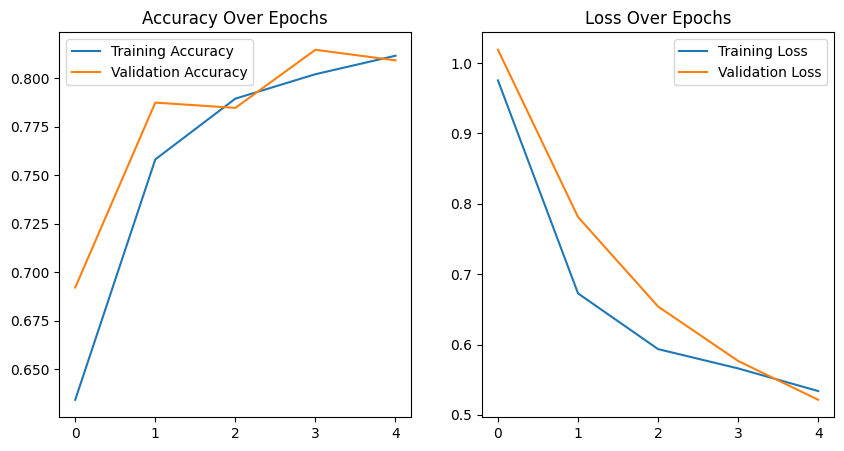

1/1 [==============================] - 0s 192ms/step
[[4.36796546e-02 2.37288121e-02 2.02719104e-02 9.03224587e-01
  9.09516308e-03]
 [1.78781003e-01 1.26962960e-01 1.14352539e-01 4.61798877e-01
  1.18104652e-01]
 [3.72927357e-03 4.38753553e-02 7.71937296e-02 2.42166780e-02
  8.50984931e-01]
 [7.43049756e-02 5.52220568e-02 8.15588161e-02 6.61596144e-03
  7.82298148e-01]
 [2.35528797e-01 2.65085846e-01 3.89851183e-02 4.16873038e-01
  4.35271673e-02]
 [4.12590466e-02 9.71808210e-02 1.20333984e-01 4.13825065e-02
  6.99843585e-01]
 [5.82762877e-04 1.00126560e-03 9.59134102e-03 1.29474036e-03
  9.87529874e-01]
 [1.91007257e-02 2.80394293e-02 8.04332793e-02 6.76007643e-02
  8.04825842e-01]
 [1.21982826e-03 3.70144262e-03 9.83088434e-01 3.22517985e-03
  8.76515079e-03]
 [6.89742684e-01 8.67876559e-02 3.64806689e-02 1.79049194e-01
  7.93973822e-03]
 [1.06384315e-01 1.11897655e-01 1.08349703e-01 6.26088798e-01
  4.72795814e-02]
 [2.72390842e-02 9.54412445e-02 5.56121409e-01 2.25439128e-02
  2.9

In [ ]:
# Step 5. 모델 성능 평가하기
# 학습 과정 시각화하기
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

# 모델의 예측 결과 확인하기
for images, labels in test_batches.take(1):
    predictions = model.predict(images)
    print(predictions)

In [ ]:
# Step 6. 모델 활용하기
def predict_image(model, image_path):
    image = tf.image.decode_jpeg(tf.io.read_file(image_path))
    image = tf.image.resize(image, (224, 224)) / 255.0
    predicted_label = model.predict(tf.expand_dims(image, 0))
    return predicted_label